# 0 TorchText

## Dataset Preview

Your first step to deep learning in NLP. We will be mostly using PyTorch. Just like torchvision, PyTorch provides an official library, torchtext, for handling text-processing pipelines. 

We will be using previous session tweet dataset. Let's just preview the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
!cp '/content/gdrive/My Drive/EVA/stanfordSentimentTreebank.zip' stanfordSentimentTreebank.zip
!unzip -q -o stanfordSentimentTreebank.zip -d stanfordSentimentTreebank

In [ ]:
import pandas as pd
df = pd.read_csv('/content/stanfordSentimentTreebank/stanfordSentimentTreebank/datasetSentences.txt',sep='\t')
df.tail()

,sentence_index,sentence
11850,11851,A real snooze .
11851,11852,No surprises .
11852,11853,We 've seen the hippie-turned-yuppie plot befo...
11853,11854,Her fans walked out muttering words like `` ho...
11854,11855,In this case zero .


In [ ]:
df.shape

(11855, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11855 entries, 0 to 11854
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sentence_index  11855 non-null  int64 
 1   sentence        11855 non-null  object
dtypes: int64(1), object(1)
memory usage: 185.4+ KB


## Defining Fields

In [ ]:
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [ ]:
class StanfordDatasetReader():
  def __init__(self, sst_dir, split_idx):
    
    merged_dataset = self.get_merged_dataset(sst_dir)
    merged_dataset['sentiment values'] = merged_dataset['sentiment values'].astype(float)
    self.dataset = merged_dataset[merged_dataset["splitset_label"] == split_idx]
    # self.dataset["Revised_Sentiment"] = self.discretize_label(self.dataset.iloc[5])
    self.dataset['Revised_sentiment values'] = self.dataset.apply(lambda x: labelfunc(x["sentiment values"]), axis=1)
    # train_st_data['Revised_sentiment values'] = train_st_data.apply(lambda x: myfunc(x["sentiment values"]), axis=1)
  # https://github.com/iamsimha/conv-sentiment-analysis/blob/master/code/dataset_reader.py
  def get_merged_dataset(self, sst_dir):

    sentiment_labels = pd.read_csv(os.path.join(sst_dir, "sentiment_labels.txt"), sep="|")
    sentence_ids = pd.read_csv(os.path.join(sst_dir, "datasetSentences.txt"), sep="\t")
    dictionary = pd.read_csv(os.path.join(sst_dir, "dictionary.txt"), sep="|", names=['phrase', 'phrase ids'])
    train_test_split = pd.read_csv(os.path.join(sst_dir, "datasetSplit.txt"))
    sentence_phrase_merge = pd.merge(sentence_ids, dictionary, left_on='sentence', right_on='phrase')
    sentence_phrase_split = pd.merge(sentence_phrase_merge, train_test_split, on='sentence_index')
    return pd.merge(sentence_phrase_split, sentiment_labels, on='phrase ids').sample(frac=1)

  def discretize_label(self, label):
    print(type(label))
    if label <= 0.2: return 0
    if label <= 0.4: return 1
    if label <= 0.6: return 2
    if label <= 0.8: return 3
    return 4

  def word_to_index(self, word):
    if word in self.w2i:
      return self.w2i[word]
    else:
      return self.w2i["<OOV>"]

  def __len__(self):
    return self.dataset.shape[0]
    
  # def __getitem__(self, idx):
  #   return {"sentence": [self.word_to_index(x) for x in self.dataset.iloc[idx, 1].split()],
  #           "label": self.discretize_label(self.dataset.iloc[idx, 5])}
  def labelfunc(label):
    if label <= 0.2: return 0
    if label <= 0.4: return 1
    if label <= 0.6: return 2
    if label <= 0.8: return 3
    return 4

  def get_data(self):
    return self.dataset

  def __getitem__(self, idx):
    return {"sentence": [x for x in self.dataset.iloc[idx, 1].split()],
            "label": self.discretize_label(self.dataset.iloc[idx, 5])}

In [ ]:
def labelfunc(label):
  if label <= 0.2: return 0
  if label <= 0.4: return 1
  if label <= 0.6: return 2
  if label <= 0.8: return 3
  return 4

In [ ]:
import os
def load_data(sst_dir="/content/stanfordSentimentTreebank/stanfordSentimentTreebank/"):
  train_st_data_cl = StanfordDatasetReader(sst_dir, 1).get_data()
  # train_st_data_cl['Revised_sentiment values'] = train_st_data.apply(lambda x: labelfunc(x["sentiment values"]), axis=1)
  test_st_data_cl = StanfordDatasetReader(sst_dir, 2).get_data()
  # test_st_data_cl['Revised_sentiment values'] = test_st_data_cl.apply(lambda x: labelfunc(x["sentiment values"]), axis=1)
  validation_st_data_cl = StanfordDatasetReader(sst_dir, 3).get_data()
  # validation_st_data_cl['Revised_sentiment values'] = validation_st_data_cl.apply(lambda x: labelfunc(x["sentiment values"]), axis=1)
  return train_st_data_cl,test_st_data_cl,validation_st_data_cl

In [ ]:
train_st_data,test_st_data,validation_st_data = load_data()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
train_st_data.head()

,sentence_index,sentence,phrase,phrase ids,splitset_label,sentiment values,Revised_sentiment values
5609,5867,This 10th film in the series looks and feels t...,This 10th film in the series looks and feels t...,110417,1,0.22222,1
2630,2747,"... a story , an old and scary one , about the...","... a story , an old and scary one , about the...",62562,1,0.50000,2
6904,7226,Spain 's greatest star wattage does n't overco...,Spain 's greatest star wattage does n't overco...,148782,1,0.30556,1
1899,1979,Miyazaki is one of world cinema 's most wondro...,Miyazaki is one of world cinema 's most wondro...,46196,1,0.94444,4
3061,3198,Beautifully reclaiming the story of Carmen and...,Beautifully reclaiming the story of Carmen and...,64292,1,0.70833,3


In [ ]:
test_st_data.tail()

,sentence_index,sentence,phrase,phrase ids,splitset_label,sentiment values,Revised_sentiment values
8266,8654,"Well before it 's over , Beijing Bicycle begin...","Well before it 's over , Beijing Bicycle begin...",150764,2,0.50000,2
7858,8232,"A soggy , cliche-bound epic-horror yarn that e...","A soggy , cliche-bound epic-horror yarn that e...",143351,2,0.22222,1
690,716,No wonder they 're talking about `` Talk to He...,No wonder they 're talking about `` Talk to He...,225167,2,0.50000,2
8282,8671,I was perplexed to watch it unfold with an ast...,I was perplexed to watch it unfold with an ast...,146138,2,0.26389,1
285,291,This is such a dazzlingly self-assured directo...,This is such a dazzlingly self-assured directo...,19365,2,0.79167,3


In [ ]:
validation_st_data.head()

,sentence_index,sentence,phrase,phrase ids,splitset_label,sentiment values,Revised_sentiment values
7335,7686,Fancy a real downer ?,Fancy a real downer ?,145273,3,0.23611,1
7245,7587,Although there are several truly jolting scare...,Although there are several truly jolting scare...,143668,3,0.50000,2
7039,7369,No way I can believe this load of junk .,No way I can believe this load of junk .,147733,3,0.16667,0
7513,7869,Nervous breakdowns are not entertaining .,Nervous breakdowns are not entertaining .,147643,3,0.23611,1
1591,1657,Director Andrew Niccol ... demonstrates a wry ...,Director Andrew Niccol ... demonstrates a wry ...,223142,3,0.72222,3


### Further NLP Augemnattion

In [ ]:
!pip install nlpaug

In [ ]:
# !pip install transformers

In [ ]:
## Lets do the NLP data augmentation
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

##### Some basic examples for understanding and then further data augmentation by these
- Substitute word by WordNet's synonym
- Swap word randomly
- Delete a set of contunous word will be removed randomly
- Delete word randomly augemnattion

In [ ]:
# validation_st_data.head()
train_st_data['sentence'].iloc[0]

'This 10th film in the series looks and feels tired .'

In [ ]:
aug = naw.SynonymAug(aug_src='wordnet') ## Substitute word by WordNet's synonym¶

augmented_text = aug.augment(train_st_data['sentence'].iloc[0])
print("Original:")
print(train_st_data['sentence'].iloc[0])
print("Augmented Text:")
print(augmented_text)
train_st_data_SynonymAug_aug = train_st_data
train_st_data_SynonymAug_aug['sentence_aug'] = train_st_data_SynonymAug_aug.apply(lambda x: aug.augment(x['sentence']),axis=1)  ## Swap word randomly¶

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
Original:
This 10th film in the series looks and feels tired .
Augmented Text:
This 10th film in the series look and feels exhaust.


In [ ]:
aug = naw.RandomWordAug(action="swap") # Swap word randomly¶

augmented_text = aug.augment(train_st_data['sentence'].iloc[0])
print("Original:")
print(train_st_data['sentence'].iloc[0])
print("Augmented Text:")
print(augmented_text)
train_st_data_swap_aug = train_st_data
train_st_data_swap_aug['sentence_aug'] = train_st_data_swap_aug.apply(lambda x: aug.augment(x['sentence']),axis=1)  ## Swap word randomly¶

Original:
This 10th film in the series looks and feels tired .
Augmented Text:
10th this film in series the looks and feels. tired


In [ ]:
# aug = naw.RandomWordAug(action='crop',aug_p=0.5, aug_min=0)
# augmented_text = aug.augment(train_st_data['sentence'].iloc[0])  ## Delete a set of contunous word will be removed randomly¶

# print("Original:")
# print(train_st_data['sentence'].iloc[0])
# print("Augmented Text:")
# print(augmented_text)
# train_st_data_crop_aug = train_st_data
# train_st_data_crop_aug['sentence_aug'] = train_st_data_crop_aug.apply(lambda x: aug.augment(x['sentence']),axis=1)  ## Delete a set of contunous word will be removed randomly¶

In [ ]:
text = 'The quick brown fox jumps over the lazy dog .'
# Augmenter that apply random word operation to textual input.Augmenter that apply randomly behavior for augmentation.
aug = naw.RandomWordAug()
augmented_data = aug.augment(text)
augmented_data

train_st_data_delete_aug = train_st_data
# train_st_data_aug[sentence_aug] = aug.augment(train_st_data_aug.loc["sentence"] )
#--Using position to slice Email using a lambda function
train_st_data_delete_aug['sentence_aug'] = train_st_data_delete_aug.apply(lambda x: aug.augment(x['sentence']),axis=1)  ## Delete word randomly augemnattion


In [ ]:
print("Original:")
print(train_st_data_delete_aug['sentence'].iloc[0])
print("Augmented Text:")
print(train_st_data_delete_aug['sentence_aug'].iloc[0])

Original:
This 10th film in the series looks and feels tired .
Augmented Text:
This 10th the looks and feels tired.


In [ ]:
train_st_data_delete_aug.head()

,sentence_index,sentence,phrase,phrase ids,splitset_label,sentiment values,Revised_sentiment values,sentence_aug
5609,5867,This 10th film in the series looks and feels t...,This 10th film in the series looks and feels t...,110417,1,0.22222,1,This 10th the looks and feels tired.
2630,2747,"... a story , an old and scary one , about the...","... a story , an old and scary one , about the...",62562,1,0.50000,2,".. . story, an old, the monsters make, and the..."
6904,7226,Spain 's greatest star wattage does n't overco...,Spain 's greatest star wattage does n't overco...,148782,1,0.30556,1,' s star wattage does n ' t the tumult maudlin.
1899,1979,Miyazaki is one of world cinema 's most wondro...,Miyazaki is one of world cinema 's most wondro...,46196,1,0.94444,4,Miyazaki of world cinema ' wondrously gifted a...
3061,3198,Beautifully reclaiming the story of Carmen and...,Beautifully reclaiming the story of Carmen and...,64292,1,0.70833,3,Beautifully the of and recreating it an in an ...


In [ ]:
## Now I need to add all these data frames
combined_data_aug = pd.concat([train_st_data_delete_aug, train_st_data_swap_aug, train_st_data_SynonymAug_aug], axis=0)
## after this, now I need to drop the sentence column and rename sentence_aug to sentence
combined_data_aug.drop('sentence', axis=1, inplace=True)
combined_data_aug.rename(columns = {'sentence_aug':'sentence'}, inplace = True) 

In [ ]:
combined_data_aug.head()

,sentence_index,phrase,phrase ids,splitset_label,sentiment values,Revised_sentiment values,sentence
5609,5867,This 10th film in the series looks and feels t...,110417,1,0.22222,1,This 10th the looks and feels tired.
2630,2747,"... a story , an old and scary one , about the...",62562,1,0.50000,2,".. . story, an old, the monsters make, and the..."
6904,7226,Spain 's greatest star wattage does n't overco...,148782,1,0.30556,1,' s star wattage does n ' t the tumult maudlin.
1899,1979,Miyazaki is one of world cinema 's most wondro...,46196,1,0.94444,4,Miyazaki of world cinema ' wondrously gifted a...
3061,3198,Beautifully reclaiming the story of Carmen and...,64292,1,0.70833,3,Beautifully the of and recreating it an in an ...


### Final Data Preparation

In [ ]:
def get_final_data(train_st_data,test_st_data,validation_st_data,combined_data_aug):
  train_st_data_final = train_st_data.drop(['sentence_index','phrase','phrase ids','splitset_label','sentiment values'],axis=1)
  train_st_data_final.rename(columns = {'Revised_sentiment values': 'sentiment'}, inplace = True)

  combined_data_aug.drop(['sentence_index','phrase','phrase ids','splitset_label','sentiment values'],axis=1,inplace=True)
  combined_data_aug.rename(columns = {'Revised_sentiment values': 'sentiment'}, inplace = True)

  train_st_data_final_mixed = pd.concat([combined_data_aug, train_st_data_final], axis=0)

  train_st_data_final_mixed = train_st_data_final_mixed.reset_index(drop=True) ## This is being done because data.Example.fromlist was failing

  test_st_data_final = test_st_data.drop(['sentence_index','phrase','phrase ids','splitset_label','sentiment values'],axis=1)
  test_st_data_final.rename(columns = {'Revised_sentiment values': 'sentiment'}, inplace = True)
  test_st_data_final = test_st_data_final.reset_index(drop=True) ## This is being done because data.Example.fromlist was failing

  validation_st_data_final = validation_st_data.drop(['sentence_index','phrase','phrase ids','splitset_label','sentiment values'],axis=1)
  validation_st_data_final.rename(columns = {'Revised_sentiment values': 'sentiment'} , inplace = True)
  validation_st_data_final = validation_st_data_final.reset_index(drop=True) ## This is being done because data.Example.fromlist was failing

  return train_st_data_final_mixed, test_st_data_final, validation_st_data_final

In [ ]:
train_st_data_final, test_st_data_final, validation_st_data_final = get_final_data(train_st_data,test_st_data,validation_st_data,combined_data_aug)
train_st_data_final.drop(['sentence_aug'],axis=1,inplace=True)

In [ ]:
train_st_data_final.head()

,sentiment,sentence
0,1,This 10th the looks and feels tired.
1,2,".. . story, an old, the monsters make, and the..."
2,1,' s star wattage does n ' t the tumult maudlin.
3,4,Miyazaki of world cinema ' wondrously gifted a...
4,3,Beautifully the of and recreating it an in an ...


In [ ]:
# train_st_data_final.to_csv(r'train_st_data_final.csv', index = False)

In [ ]:
train_st_data_final.shape

(32468, 2)

In [ ]:
train_st_data_final.sentiment.value_counts()

3    8864
1    8368
2    6196
4    4920
0    4120
Name: sentiment, dtype: int64

In [ ]:
validation_st_data_final.sentiment.value_counts()

1    276
3    259
2    219
4    158
0    132
Name: sentiment, dtype: int64

Now we shall be defining LABEL as a LabelField, which is a subclass of Field that sets sequen tial to False (as it’s our numerical category class). TWEET is a standard Field object, where we have decided to use the spaCy tokenizer and convert all the text to lower‐ case.

In [ ]:
# Import Library
import random
import torch, torchtext
from torchtext import data 
import pandas as pd
# Manual Seed
SEED = 43
torch.manual_seed(SEED)

In [ ]:
Sentence = data.Field(sequential = True, tokenize = 'spacy', batch_first =True, include_lengths=True)
Sentiment = data.LabelField(tokenize ='spacy',is_target=True, batch_first =True, sequential =False)

Having defined those fields, we now need to produce a list that maps them onto the list of rows that are in the CSV:

In [ ]:
fields = [('sentence', Sentence),('sentiment',Sentiment)]

In [ ]:
# saving the dataframe 
train_st_data_final.to_csv('train_st_data_final.csv', index=False) 
test_st_data_final.to_csv('test_st_data_final.csv', index=False) 
validation_st_data_final.to_csv('validation_st_data_final.csv', index=False) 

In [ ]:
!cp '/content/gdrive/My Drive/EVA/train_st_data_final_fine_grained.csv' train_st_data_final_fine_grained.csv
!cp '/content/gdrive/My Drive/EVA/validation_st_data_final_fine_grained.csv' validation_st_data_final_fine_grained.csv
!cp '/content/gdrive/My Drive/EVA/test_st_data_final_fine_grained.csv' test_st_data_final_fine_grained.csv

In [ ]:
train_st_data_final = pd.read_csv("train_st_data_final_fine_grained.csv")
test_st_data_final = pd.read_csv("test_st_data_final_fine_grained.csv")
validation_st_data_final = pd.read_csv("validation_st_data_final_fine_grained.csv")

In [ ]:
train_st_data_final.head()
# train_st_data_final.drop(['sentence_aug'],axis=1,inplace=True)

,sentiment,sentence
0,1,This 10th the looks and feels tired.
1,2,".. . story, an old, the monsters make, and the..."
2,1,' s star wattage does n ' t the tumult maudlin.
3,4,Miyazaki of world cinema ' wondrously gifted a...
4,3,Beautifully the of and recreating it an in an ...


In [ ]:
test_st_data_final.head()

,sentence,sentiment
0,"It 's tough , astringent , darkly funny and .....",2
1,"The principals in this cast are all fine , but...",4
2,Obstacles are too easily overcome and there is...,0
3,It 's difficult to say whether The Tuxedo is m...,0
4,"This is a throwaway , junk-food movie whose ra...",0


Text(0, 0.5, 'sentiment')

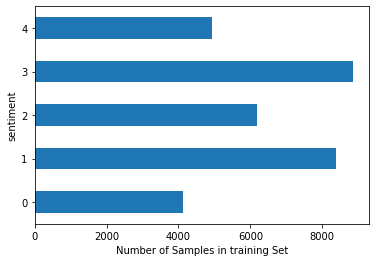

In [ ]:
import matplotlib.pyplot as plt
ax = train_st_data_final['sentiment'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in training Set")
ax.set_ylabel("sentiment")

It is clear that most of the training samples belong to classes 0 and 3 (the weakly negative/positive classes). A sizeable number of samples belong to the neutral class. Barely 12% of the samples are from the strongly negative class 1, which is something to keep in mind as we evaluate our classifier accuracy.

In [ ]:
# # saving the dataframe 
# train_st_data_final.to_csv('train_st_data_final.csv', index=False) 
# test_st_data_final.to_csv('test_st_data_final.csv', index=False) 
# validation_st_data_final.to_csv('validation_st_data_final.csv', index=False) 

Armed with our declared fields, lets convert from pandas to list to torchtext. We could also use TabularDataset to apply that definition to the CSV directly but showing an alternative approach too.

In [ ]:
example_trng = [data.Example.fromlist([train_st_data_final.sentence[i],train_st_data_final.sentiment[i]], fields) for i in range(train_st_data_final.shape[0])] 
example_val = [data.Example.fromlist([validation_st_data_final.sentence[i],validation_st_data_final.sentiment[i]], fields) for i in range(validation_st_data_final.shape[0])] 

In [ ]:
# Creating dataset
#twitterDataset = data.TabularDataset(path="tweets.csv", format="CSV", fields=fields, skip_header=True)

# twitterDataset = data.Dataset(example, fields)
train = data.Dataset(example_trng, fields)
valid = data.Dataset(example_val, fields)

Finally, we can split into training, testing, and validation sets by using the split() method:

In [ ]:
# (train, valid) = twitterDataset.split(split_ratio=[0.85, 0.15], random_state=random.seed(SEED))

In [ ]:
(len(train), len(valid))

(32468, 1044)

An example from the dataset:

In [ ]:
vars(train.examples[10])

{'sentence': ['These', 'become', 'wearisome', '.'], 'sentiment': 1}

## Building Vocabulary

At this point we would have built a one-hot encoding of each word that is present in the dataset—a rather tedious process. Thankfully, torchtext will do this for us, and will also allow a max_size parameter to be passed in to limit the vocabu‐ lary to the most common words. This is normally done to prevent the construction of a huge, memory-hungry model. We don’t want our GPUs too overwhelmed, after all. 

Let’s limit the vocabulary to a maximum of 5000 words in our training set:


In [ ]:
MAX_VOCAB_SIZE = 25_000

Sentence.build_vocab(train, 
                 max_size = MAX_VOCAB_SIZE, 
                 vectors = "glove.6B.200d", 
                #  vectors = "glove.6B.300d",
                 unk_init = torch.Tensor.normal_)




  0%|          | 0/400000 [00:00<?, ?it/s]


  0%|          | 927/400000 [00:00<00:43, 9266.16it/s]


  0%|          | 1945/400000 [00:00<00:41, 9521.61it/s]


  1%|          | 2984/400000 [00:00<00:40, 9766.26it/s]


  1%|          | 4000/400000 [00:00<00:40, 9880.51it/s]


  1%|          | 4926/400000 [00:00<00:40, 9684.93it/s]


  1%|▏         | 5932/400000 [00:00<00:40, 9794.18it/s]


  2%|▏         | 6969/400000 [00:00<00:39, 9959.95it/s]


  2%|▏         | 8018/400000 [00:00<00:38, 10111.28it/s]


  2%|▏         | 9041/400000 [00:00<00:38, 10146.49it/s]


  3%|▎         | 10052/400000 [00:01<00:38, 10133.32it/s]


  3%|▎         | 11065/400000 [00:01<00:38, 10132.10it/s]


  3%|▎         | 12061/400000 [00:01<00:38, 9998.38it/s] 


  3%|▎         | 13058/400000 [00:01<00:38, 9988.84it/s]


  4%|▎         | 14049/400000 [00:01<00:38, 9962.09it/s]


  4%|▍         | 15040/400000 [00:01<00:39, 9681.93it/s]


  4%|▍         | 16051/400000 [00:01<00:39, 9806.27it/s]


  4%|▍       

In [ ]:
Sentiment.build_vocab(train)
# https://github.com/shayneobrien/sentiment-classification/blob/master/notebooks/11-cnn-conv2d-cbow-glove.ipynb
# https://github.com/shayneobrien/sentiment-classification

In [ ]:
# Sentence.build_vocab(train)
# Sentiment.build_vocab(train)

By default, torchtext will add two more special tokens, <unk> for unknown words and <pad>, a padding token that will be used to pad all our text to roughly the same size to help with efficient batching on the GPU.

In [ ]:
print('Size of input vocab : ', len(Sentence.vocab))
print('Size of label vocab : ', len(Sentiment.vocab))
print('Top 10 words appreared repeatedly :', list(Sentence.vocab.freqs.most_common(10)))
print('Labels : ', Sentiment.vocab.stoi)

Size of input vocab :  17033
Size of label vocab :  5
Top 10 words appreared repeatedly : [('.', 31965), (',', 26833), ('the', 17369), ('-', 13429), ("'", 13351), ('of', 12627), ('and', 12429), ('a', 12304), ('to', 8634), ('is', 6993)]
Labels :  defaultdict(<function _default_unk_index at 0x7fc9a77871e0>, {3: 0, 1: 1, 2: 2, 4: 3, 0: 4})


In [ ]:
print('Size of input vocab : ', len(Sentence.vocab))
print('Size of label vocab : ', len(Sentiment.vocab))
print('Top 10 words appreared repeatedly :', list(Sentence.vocab.freqs.most_common(10)))
print('Labels : ', Sentiment.vocab.stoi)

Size of input vocab :  17033
Size of label vocab :  5
Top 10 words appreared repeatedly : [('.', 31965), (',', 26833), ('the', 17369), ('-', 13429), ("'", 13351), ('of', 12627), ('and', 12429), ('a', 12304), ('to', 8634), ('is', 6993)]
Labels :  defaultdict(<function _default_unk_index at 0x7fc9a77871e0>, {3: 0, 1: 1, 2: 2, 4: 3, 0: 4})


**Lots of stopwords!!**

Now we need to create a data loader to feed into our training loop. Torchtext provides the BucketIterator method that will produce what it calls a Batch, which is almost, but not quite, like the data loader we used on images.

But at first declare the device we are using.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
train_iterator, valid_iterator = data.BucketIterator.splits((train, valid), batch_size = 32, 
                                                            sort_key = lambda x: len(x.sentence),
                                                            sort_within_batch=True, device = device)

Save the vocabulary for later use

In [ ]:
import os, pickle
with open('tokenizer.pkl', 'wb') as tokens: 
    pickle.dump(Sentence.vocab.stoi, tokens)

## Defining Our Model

We use the Embedding and LSTM modules in PyTorch to build a simple model for classifying tweets.

In this model we create three layers. 
1. First, the words in our tweets are pushed into an Embedding layer, which we have established as a 300-dimensional vector embedding. 
2. That’s then fed into a 2 stacked-LSTMs with 100 hidden features (again, we’re compressing down from the 300-dimensional input like we did with images). We are using 2 LSTMs for using the dropout.
3. Finally, the output of the LSTM (the final hidden state after processing the incoming tweet) is pushed through a standard fully connected layer with three outputs to correspond to our three possible classes (negative, positive, or neutral).

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class classifier(nn.Module):
    
    # Define all the layers used in model
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout, bidirectional,pad_idx):
        
        super().__init__()          
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim,padding_idx = pad_idx)
        
        # LSTM layer
        self.encoder = nn.LSTM(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           dropout=dropout,
                           bidirectional = bidirectional,
                           batch_first=True)
        # try using nn.GRU or nn.RNN here and compare their performances
        # try bidirectional and compare their performances
        self.dropout = nn.Dropout(dropout)
        # Dense layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, text, text_lengths):
        
        # text = [batch size, sent_length]
        embedded = self.embedding(text)
        # embedded = [batch size, sent_len, emb dim]
      
        # packed sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True)
        
        packed_output, (hidden, cell) = self.encoder(packed_embedded)
        #hidden = [batch size, num layers * num directions,hid dim]
        #cell = [batch size, num layers * num directions,hid dim]
    
        # Hidden = [batch size, hid dim * num directions]
        dense_outputs = self.dropout(self.fc(hidden))  
        # Final activation function softmax
        output = F.softmax(dense_outputs[0], dim=1)
        # output = F.softmax(dense_outputs, dim=1)
            
        return output

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class classifier(nn.Module):
    
    # Define all the layers used in model
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, dropout, bidirectional,pad_idx):
        
        super().__init__()          
        
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim,padding_idx = pad_idx)
        
        # LSTM layer
        self.encoder = nn.GRU(embedding_dim, 
                           hidden_dim, 
                           num_layers=n_layers, 
                           dropout=dropout,
                           bidirectional = bidirectional,
                           batch_first=True)
        # try using nn.GRU or nn.RNN here and compare their performances
        # try bidirectional and compare their performances
        self.dropout = nn.Dropout(dropout)
        # Dense layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, text, text_lengths):
        
        # text = [batch size, sent_length]
        embedded = self.embedding(text)
        # embedded = [batch size, sent_len, emb dim]
      
        # packed sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), batch_first=True)
        
        packed_output, (hidden) = self.encoder(packed_embedded)
        #hidden = [batch size, num layers * num directions,hid dim]
        #cell = [batch size, num layers * num directions,hid dim]
    
        # Hidden = [batch size, hid dim * num directions]
        dense_outputs = self.dropout(self.fc(hidden))  
        # Final activation function softmax
        output = F.softmax(dense_outputs[0], dim=1)
        # output = F.softmax(dense_outputs, dim=1)
            
        return output

In [ ]:
# Define hyperparameters
size_of_vocab = len(Sentence.vocab)
embedding_dim = 200
num_hidden_nodes = 256
num_output_nodes = 5
num_layers = 5
dropout = 0.4
bidirectional = True
PAD_IDX = Sentence.vocab.stoi[Sentence.pad_token]

# Instantiate the model
model = classifier(size_of_vocab, embedding_dim, num_hidden_nodes, num_output_nodes, num_layers, dropout, bidirectional,PAD_IDX)

In [ ]:
print(model)

#No. of trianable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    
print(f'The model has {count_parameters(model):,} trainable parameters')

classifier(
  (embedding): Embedding(17033, 200, padding_idx=1)
  (encoder): GRU(200, 256, num_layers=5, batch_first=True, dropout=0.4, bidirectional=True)
  (dropout): Dropout(p=0.4, inplace=False)
  (fc): Linear(in_features=256, out_features=5, bias=True)
)
The model has 8,842,253 trainable parameters


## Model Training and Evaluation

First define the optimizer and loss functions

In [ ]:
import torch.optim as optim

# define optimizer and loss
optimizer = optim.Adam(model.parameters(), lr=2e-3)
criterion = nn.CrossEntropyLoss()

# define metric
def binary_accuracy(preds, y):
    #round predictions to the closest integer
    _, predictions = torch.max(preds, 1)
    
    correct = (predictions == y).float() 
    acc = correct.sum() / len(correct)
    return acc
    


In [ ]:
pretrained_embeddings = Sentence.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([17033, 200])


In [ ]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-0.7719,  1.4995, -1.8566,  ..., -0.6172,  0.3225,  1.8172],
        [-0.9759, -0.6801,  2.1196,  ..., -2.1158, -1.4810, -1.4756],
        [ 0.1229,  0.5804, -0.0696,  ..., -0.0392, -0.1624, -0.0967],
        ...,
        [-0.3767, -0.2188, -0.0797,  ...,  0.9097,  0.5368,  0.0905],
        [ 0.2897,  0.0912,  0.7914,  ...,  1.0182, -0.6181,  0.2724],
        [-0.4719, -0.4627, -0.1236,  ...,  0.1917,  0.4779, -0.0116]])

In [ ]:
UNK_IDX = Sentence.vocab.stoi[Sentence.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(embedding_dim)
model.embedding.weight.data[PAD_IDX] = torch.zeros(embedding_dim)

print(model.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.1229,  0.5804, -0.0696,  ..., -0.0392, -0.1624, -0.0967],
        ...,
        [-0.3767, -0.2188, -0.0797,  ...,  0.9097,  0.5368,  0.0905],
        [ 0.2897,  0.0912,  0.7914,  ...,  1.0182, -0.6181,  0.2724],
        [-0.4719, -0.4627, -0.1236,  ...,  0.1917,  0.4779, -0.0116]])


In [ ]:
# push to cuda if available
model = model.to(device)
criterion = criterion.to(device)

The main thing to be aware of in this new training loop is that we have to reference `batch.tweets` and `batch.labels` to get the particular fields we’re interested in; they don’t fall out quite as nicely from the enumerator as they do in torchvision.

**Training Loop**

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    # initialize every epoch 
    epoch_loss = 0
    epoch_acc = 0
    
    # set the model in training phase
    model.train()  
    
    for batch in iterator:
        
        # resets the gradients after every batch
        optimizer.zero_grad()   
        
        # retrieve text and no. of words
        tweet, tweet_lengths = batch.sentence   
        
        # convert to 1D tensor
        predictions = model(tweet, tweet_lengths).squeeze()  
        
        # compute the loss
        loss = criterion(predictions, batch.sentiment)        
        
        # compute the binary accuracy
        acc = binary_accuracy(predictions, batch.sentiment)   
        
        # backpropage the loss and compute the gradients
        loss.backward()       
        
        # update the weights
        optimizer.step()      
        
        # loss and accuracy
        epoch_loss += loss.item()  
        epoch_acc += acc.item()    
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

**Evaluation Loop**

In [ ]:
def evaluate(model, iterator, criterion):
    
    # initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    # deactivating dropout layers
    model.eval()
    
    # deactivates autograd
    with torch.no_grad():
    
        for batch in iterator:
        
            # retrieve text and no. of words
            tweet, tweet_lengths = batch.sentence
            
            # convert to 1d tensor
            predictions = model(tweet, tweet_lengths).squeeze()
            
            # compute loss and accuracy
            loss = criterion(predictions, batch.sentiment)
            acc = binary_accuracy(predictions, batch.sentiment)
            
            # keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

**Let's Train and Evaluate**

In [ ]:
N_EPOCHS = 15
best_valid_loss = float('inf')
#freeze embeddings
model.embedding.weight.requires_grad = unfrozen = False

for epoch in range(N_EPOCHS):
     
    # train the model
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    
    # evaluate the model
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% \n')

	Train Loss: 1.536 | Train Acc: 35.11%
	 Val. Loss: 1.492 |  Val. Acc: 39.38% 

	Train Loss: 1.448 | Train Acc: 45.68%
	 Val. Loss: 1.496 |  Val. Acc: 39.58% 

	Train Loss: 1.372 | Train Acc: 53.58%
	 Val. Loss: 1.507 |  Val. Acc: 37.69% 

	Train Loss: 1.331 | Train Acc: 58.04%
	 Val. Loss: 1.506 |  Val. Acc: 37.54% 

	Train Loss: 1.299 | Train Acc: 61.12%
	 Val. Loss: 1.506 |  Val. Acc: 38.31% 

	Train Loss: 1.279 | Train Acc: 63.08%
	 Val. Loss: 1.508 |  Val. Acc: 38.83% 

	Train Loss: 1.265 | Train Acc: 64.72%
	 Val. Loss: 1.518 |  Val. Acc: 38.54% 

	Train Loss: 1.258 | Train Acc: 65.57%
	 Val. Loss: 1.505 |  Val. Acc: 39.09% 

	Train Loss: 1.250 | Train Acc: 66.24%
	 Val. Loss: 1.510 |  Val. Acc: 38.73% 

	Train Loss: 1.249 | Train Acc: 66.04%
	 Val. Loss: 1.512 |  Val. Acc: 37.92% 

	Train Loss: 1.242 | Train Acc: 66.82%
	 Val. Loss: 1.508 |  Val. Acc: 38.67% 

	Train Loss: 1.242 | Train Acc: 66.92%
	 Val. Loss: 1.499 |  Val. Acc: 40.25% 

	Train Loss: 1.239 | Train Acc: 67.09%
	

In [ ]:
path='./saved_weights.pt'
model.load_state_dict(torch.load(path));

In [ ]:
N_EPOCHS = 15
best_valid_loss = float('inf')
#freeze embeddings
model.embedding.weight.requires_grad = unfrozen = True

for epoch in range(N_EPOCHS):
     
    # train the model
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    
    # evaluate the model
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    # save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% \n')

	Train Loss: 1.213 | Train Acc: 70.59%
	 Val. Loss: 1.408 |  Val. Acc: 49.00% 

	Train Loss: 1.154 | Train Acc: 76.56%
	 Val. Loss: 1.387 |  Val. Acc: 51.65% 

	Train Loss: 1.114 | Train Acc: 80.64%
	 Val. Loss: 1.430 |  Val. Acc: 46.69% 

	Train Loss: 1.090 | Train Acc: 83.12%
	 Val. Loss: 1.449 |  Val. Acc: 44.64% 

	Train Loss: 1.073 | Train Acc: 84.69%
	 Val. Loss: 1.427 |  Val. Acc: 47.03% 

	Train Loss: 1.059 | Train Acc: 86.40%
	 Val. Loss: 1.407 |  Val. Acc: 49.20% 

	Train Loss: 1.051 | Train Acc: 87.06%
	 Val. Loss: 1.466 |  Val. Acc: 43.22% 

	Train Loss: 1.045 | Train Acc: 87.53%
	 Val. Loss: 1.440 |  Val. Acc: 45.70% 

	Train Loss: 1.038 | Train Acc: 88.33%
	 Val. Loss: 1.446 |  Val. Acc: 45.00% 

	Train Loss: 1.033 | Train Acc: 88.86%
	 Val. Loss: 1.461 |  Val. Acc: 43.66% 

	Train Loss: 1.026 | Train Acc: 89.44%
	 Val. Loss: 1.439 |  Val. Acc: 46.27% 

	Train Loss: 1.023 | Train Acc: 89.99%
	 Val. Loss: 1.448 |  Val. Acc: 45.45% 

	Train Loss: 1.020 | Train Acc: 90.36%
	

## Model Testing

In [ ]:
#load weights and tokenizer

path='./saved_weights.pt'
model.load_state_dict(torch.load(path));
model.eval();
tokenizer_file = open('./tokenizer.pkl', 'rb')
tokenizer = pickle.load(tokenizer_file)

#inference 

import spacy
nlp = spacy.load('en')

def classify_tweet(tweet):
    
    categories = {0: "Negative", 1:"Positive", 2:"Neutral"}
    
    # tokenize the tweet 
    tokenized = [tok.text for tok in nlp.tokenizer(tweet)] 
    # convert to integer sequence using predefined tokenizer dictionary
    indexed = [tokenizer[t] for t in tokenized]        
    # compute no. of words        
    length = [len(indexed)]
    # convert to tensor                                    
    tensor = torch.LongTensor(indexed).to(device)   
    # reshape in form of batch, no. of words           
    tensor = tensor.unsqueeze(1).T  
    # convert to tensor                          
    length_tensor = torch.LongTensor(length)
    # Get the model prediction                  
    prediction = model(tensor, length_tensor)

    _, pred = torch.max(prediction, 1) 
    
    return categories[pred.item()]

In [ ]:
classify_tweet("A valid explanation for why Trump won't let women on the golf course.")

'Negative'

## Discussion on Data Augmentation Techniques 

You might wonder exactly how you can augment text data. After all, you can’t really flip it horizontally as you can an image! :D 

In contrast to data augmentation in images, augmentation techniques on data is very specific to final product you are building. As its general usage on any type of textual data doesn't provides a significant performance boost, that's why unlike torchvision, torchtext doesn’t offer a augmentation pipeline. Due to powerful models as transformers, augmentation tecnhiques are not so preferred now-a-days. But its better to know about some techniques with text that will provide your model with a little more information for training. 

### Synonym Replacement

First, you could replace words in the sentence with synonyms, like so:

    The dog slept on the mat

could become

    The dog slept on the rug

Aside from the dog's insistence that a rug is much softer than a mat, the meaning of the sentence hasn’t changed. But mat and rug will be mapped to different indices in the vocabulary, so the model will learn that the two sentences map to the same label, and hopefully that there’s a connection between those two words, as everything else in the sentences is the same.

### Random Insertion
A random insertion technique looks at a sentence and then randomly inserts synonyms of existing non-stopwords into the sentence n times. Assuming you have a way of getting a synonym of a word and a way of eliminating stopwords (common words such as and, it, the, etc.), shown, but not implemented, in this function via get_synonyms() and get_stopwords(), an implementation of this would be as follows:


In [ ]:
def random_insertion(sentence, n): 
    words = remove_stopwords(sentence) 
    for _ in range(n):
        new_synonym = get_synonyms(random.choice(words))
        sentence.insert(randrange(len(sentence)+1), new_synonym) 
    return sentence

## Random Deletion
As the name suggests, random deletion deletes words from a sentence. Given a probability parameter p, it will go through the sentence and decide whether to delete a word or not based on that random probability. Consider of it as pixel dropouts while treating images.

In [ ]:
def random_deletion(words, p=0.5): 
    if len(words) == 1: # return if single word
        return words
    remaining = list(filter(lambda x: random.uniform(0,1) > p,words)) 
    if len(remaining) == 0: # if not left, sample a random word
        return [random.choice(words)] 
    else:
        return remaining

### Random Swap
The random swap augmentation takes a sentence and then swaps words within it n times, with each iteration working on the previously swapped sentence. Here we sample two random numbers based on the length of the sentence, and then just keep swapping until we hit n.

In [ ]:
def random_swap(sentence, n=5): 
    length = range(len(sentence)) 
    for _ in range(n):
        idx1, idx2 = random.sample(length, 2)
        sentence[idx1], sentence[idx2] = sentence[idx2], sentence[idx1] 
    return sentence

For more on this please go through this [paper](https://arxiv.org/pdf/1901.11196.pdf).

### Back Translation

Another popular approach for augmenting text datasets is back translation. This involves translating a sentence from our target language into one or more other languages and then translating all of them back to the original language. We can use the Python library googletrans for this purpose. 

In [ ]:
!pip install googletrans==3.1.0a0

     |████████████████████████████████| 61kB 5.2MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 983kB 16.3MB/s 
     |████████████████████████████████| 71kB 9.3MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
     |████████████████████████████████| 102kB 10.9MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-cp36-none-any.whl size=16369 sha256=8a754f7952c21a6c71e0c349e65883dc83f6a1241d99d6d48ef486f89c5cfc01
  Stored in directory: /root/.cache/pip/wheels/27/7a/a0/aff3babbb775549ce6813cb8fa7ff3c0848c4dc62c20f8fdac
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=78084eef51a489f26515c4b31f82e531404cb1a872edf3691bb11e868b213298
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
import random
import googletrans
from googletrans import Translator

# import googletrans.Translator

translator = Translator()
sentence = ['The dog slept on the rug']

available_langs = list(googletrans.LANGUAGES.keys()) 
trans_lang = random.choice(available_langs) 
print(f"Translating to {googletrans.LANGUAGES[trans_lang]}")

translations = translator.translate(sentence, dest=trans_lang) 
t_text = [t.text for t in translations]
print(t_text)

translations_en_random = translator.translate(t_text, src=trans_lang, dest='en') 
en_text = [t.text for t in translations_en_random]
print(en_text)

Translating to malay
['Anjing itu tidur di atas permaidani']
['The dog slept on the carpet']
